In [28]:
from newsdataapi import NewsDataApiClient
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from credentials import *

%matplotlib inline

In [29]:
# API key authorization, Initialize the client with your API key
api = NewsDataApiClient(apikey)

In [30]:
from pandas import json_normalize

# Retrieve NewData.io information sources
#response = api.sources_api( country="us") 
response = api.sources_api(country="us")



# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(response)



# Flatten the nested structure
df_flattened = json_normalize(df.to_dict('records'))


News_Df = df_flattened.drop('status', axis=1)

# Display the flattened DataFrame
#print(df)
#df_flattened 
News_Source_Df = News_Df
News_Source_Df

,results.id,results.name,results.url,results.description,results.category,results.language,results.country
0,techaeris,Techaeris,https://techaeris.com/,"Founded in 2013 by Alex Hernandez, Techaeris h...",[top],[english],[united states of america]
1,teslarati,TeslaRati,https://www.teslarati.com,"The leading source for Tesla news, rumors, and...","[technology, science]",[english],"[united kingdom, australia, canada, united sta..."
2,interestingengineering,Interesting Engineering,https://interestingengineering.com/,"Interesting Engineering is a cutting edge, lea...","[science, health, top, entertainment]",[english],[united states of america]
3,nydailynews,New York Daily News,https://www.nydailynews.com/,New York Daily News,[top],[english],[united states of america]
4,grantland,Grantland,https://grantland.com/,Home of the Triangle | Hollywood Prospectus.,"[top, entertainment]",[english],[united states of america]
...,...,...,...,...,...,...,...
95,bitcoinnews,Bitcoin News,https://bitcoinnews.com/,Get the latest updates and insights on Bitcoin...,[top],[english],[united states of america]
96,comicbook,Comic Book,https://comicbook.com/,Comic Book is the leading website for geek ent...,"[top, entertainment]",[english],[united states of america]
97,bytefunding,Bytefunding,http://bytefunding.com/,ByteFunding.com is an international technology...,[top],[english],[united states of america]
98,westernjournal,The Western Journal,https://www.westernjournal.com/,Real Stories. Real People.,"[politics, science, top, entertainment, world,...",[english],[united states of america]


In [31]:
# countries 
countries = ['us', 'ca', 'gb', 'au']


# loop throughout the countries 
for country in countries:
    # News API
    titles = api.news_api(qInTitle="hello&kitty", country= countries)

    # Check if the request was successful
    if titles['status'] == 'success':

        # Iterate through the list of articles and print titles
        for article in titles['results']:
            print(country.upper(), ": ", article['title'])
    else:
        print("Error in API request:", titles['message'])



In [32]:
# News API
# Retrieve NewData.io information
new_response = api.news_api(q= "cat" , country = "us")

# News in another language
#new_response = api.news_api(q= "gato" , country = "br")


# Convert the list of dictionaries to a DataFrame
df2 = pd.DataFrame(new_response)



# Flatten the nested structure
df_flattened2 = json_normalize(df2.to_dict('records'))


News_Df_flat = df_flattened2.drop('status', axis=1)

# Display the flattened DataFrame
#print(df)
#df_flattened 
News_Df = News_Df_flat

News_Df


,totalResults,nextPage,results.article_id,results.title,results.link,results.keywords,results.creator,results.video_url,results.description,results.content,results.pubDate,results.image_url,results.source_id,results.source_priority,results.country,results.category,results.language
0,120,1701684602823697082,3b57bf8bfa26f78f2f2fbf4a5a0a6996,"Lit Hub Daily: December 4, 2023",https://lithub.com/lit-hub-daily-december-4-2023/,[Lit Hub Daily],[Lit Hub Daily],None,Also on Lit Hub:,Also on Lit Hub:,2023-12-04 11:30:21,https://s26162.pcdn.co/wp-content/uploads/2018...,lithub,9479,[united states of america],[top],english
1,120,1701684602823697082,cb7a8ca681238cea5e635a04d2495239,Mission Raniganj Ending Explained & Spoilers: ...,https://www.comingsoon.net/indian/news/1424435...,"[Indian Movies and TV, AK Productions, Akshay ...",[Shruti Kotiya],None,"Akshay Kumar‘s latest film, Mission Raniganj, ...",Mission Raniganj Ending Explained & Spoilers: ...,2023-12-04 11:02:49,https://www.comingsoon.net/wp-content/uploads/...,comingsoon,3031,[united states of america],[entertainment],english
2,120,1701684602823697082,4fdae32471a40bbff61dd3562d5982cb,This year's most poignant and powerful narrati...,https://www.latimes.com/entertainment-arts/sto...,None,[Todd Martens],None,"In 2023 the most mature, poignant and thoughtf...",We still too often talk about video games as e...,2023-12-04 11:00:27,https://ca-times.brightspotcdn.com/dims4/defau...,latimes,267,[united states of america],[entertainment],english
3,120,1701684602823697082,faea8408c65effd7a4ceda721a626d16,Jesse Itzler’s Secrets of Success,https://www.newyorker.com/magazine/2023/12/11/...,[Magazine / Profiles],[Tad Friend],None,An upstart motivational speaker wants to refor...,"Life is a winding road. A lonely road, a dark ...",2023-12-04 11:00:00,https://media.newyorker.com/photos/6569349894b...,newyorker,776,[united states of america],[top],english
4,120,1701684602823697082,37c5f2be89d591a5b3135c59ec8acce3,Men's WorldTour 2024 - Comprehensive team-by-t...,https://www.cyclingnews.com/features/mens-worl...,None,[Barry Ryan],None,A closer look at every squad in the top flight...,"As the calendar flips into December, thoughts ...",2023-12-04 10:58:36,https://cdn.mos.cms.futurecdn.net/fqEfBvGZ6Vmi...,cyclingnews,7612,[united states of america],[technology],english
5,120,1701684602823697082,46dd87a9940aeeb71ab33a6914515904,"10 functional health predictions for 2024, acc...",https://www.foxnews.com/health/10-functional-h...,"[b293a2fc-a043-542c-9c44-f7f88ba954ac, fnc, Fo...",None,None,"Shilpa P. Saxena, MD, chief medical officer of...",close Video Fox News Flash top headlines for D...,2023-12-04 10:52:10,https://a57.foxnews.com/static.foxnews.com/fox...,foxnews,59,[united states of america],[health],english
6,120,1701684602823697082,8742f4d2f06e239e6b203c9cffa6826d,A former burglar who was jailed for 10 years r...,https://www.businessinsider.com/former-burglar...,None,[Lindsay Dodgson],None,None,Jennifer Gomez was in prison between 2011 and ...,2023-12-04 10:51:58,None,businessinsider_us,133,[united states of america],[top],english
7,120,1701684602823697082,5b9fae835aa626d2da25e5fcb0c88674,Russian Cat Killer 'Eliminated' on Ukraine Fro...,https://www.newsweek.com/russian-cat-killer-uk...,None,None,None,"The Russian man, who was convicted for torturi...",A Russian man who was convicted for torturing ...,2023-12-04 10:35:14,None,newsweek,537,[united states of america],[top],english
8,120,1701684602823697082,05551b701cb32765484c85f292aceb9b,Fargo to cut down prairie garden maintained by...,https://www.inforum.com/news/fargo/fargo-to-cu...,None,[Melissa Van Der Stad],None,The vote overturned a recent approval from a l...,FARGO — After taking it upon himself to plant ...,2023-12-04 10:20:00,None,inforum,14163,[united states of america],[top],english
9,120,1701684602823697082,5bf51ee471857b3f2a77793809048845,Karthi’s New Tamil Movie Japan OTT Release Dat...,https://www.comingsoon.net/indian/news/142433

In [33]:
print(News_Df.columns)

Index(['totalResults', 'nextPage', 'results.article_id', 'results.title',
       'results.link', 'results.keywords', 'results.creator',
       'results.video_url', 'results.description', 'results.content',
       'results.pubDate', 'results.image_url', 'results.source_id',
       'results.source_priority', 'results.country', 'results.category',
       'results.language'],
      dtype='object')


In [34]:
# Clean up dataframe
News_Df = News_Df.drop(['results.image_url', 'totalResults', 'nextPage', 'results.article_id', 'results.video_url', 'results.source_priority'], axis = 1)

News_Df

,results.title,results.link,results.keywords,results.creator,results.description,results.content,results.pubDate,results.source_id,results.country,results.category,results.language
0,"Lit Hub Daily: December 4, 2023",https://lithub.com/lit-hub-daily-december-4-2023/,[Lit Hub Daily],[Lit Hub Daily],Also on Lit Hub:,Also on Lit Hub:,2023-12-04 11:30:21,lithub,[united states of america],[top],english
1,Mission Raniganj Ending Explained & Spoilers: ...,https://www.comingsoon.net/indian/news/1424435...,"[Indian Movies and TV, AK Productions, Akshay ...",[Shruti Kotiya],"Akshay Kumar‘s latest film, Mission Raniganj, ...",Mission Raniganj Ending Explained & Spoilers: ...,2023-12-04 11:02:49,comingsoon,[united states of america],[entertainment],english
2,This year's most poignant and powerful narrati...,https://www.latimes.com/entertainment-arts/sto...,None,[Todd Martens],"In 2023 the most mature, poignant and thoughtf...",We still too often talk about video games as e...,2023-12-04 11:00:27,latimes,[united states of america],[entertainment],english
3,Jesse Itzler’s Secrets of Success,https://www.newyorker.com/magazine/2023/12/11/...,[Magazine / Profiles],[Tad Friend],An upstart motivational speaker wants to refor...,"Life is a winding road. A lonely road, a dark ...",2023-12-04 11:00:00,newyorker,[united states of america],[top],english
4,Men's WorldTour 2024 - Comprehensive team-by-t...,https://www.cyclingnews.com/features/mens-worl...,None,[Barry Ryan],A closer look at every squad in the top flight...,"As the calendar flips into December, thoughts ...",2023-12-04 10:58:36,cyclingnews,[united states of america],[technology],english
5,"10 functional health predictions for 2024, acc...",https://www.foxnews.com/health/10-functional-h...,"[b293a2fc-a043-542c-9c44-f7f88ba954ac, fnc, Fo...",None,"Shilpa P. Saxena, MD, chief medical officer of...",close Video Fox News Flash top headlines for D...,2023-12-04 10:52:10,foxnews,[united states of america],[health],english
6,A former burglar who was jailed for 10 years r...,https://www.businessinsider.com/former-burglar...,None,[Lindsay Dodgson],None,Jennifer Gomez was in prison between 2011 and ...,2023-12-04 10:51:58,businessinsider_us,[united states of america],[top],english
7,Russian Cat Killer 'Eliminated' on Ukraine Fro...,https://www.newsweek.com/russian-cat-killer-uk...,None,None,"The Russian man, who was convicted for torturi...",A Russian man who was convicted for torturing ...,2023-12-04 10:35:14,newsweek,[united states of america],[top],english
8,Fargo to cut down prairie garden maintained by...,https://www.inforum.com/news/fargo/fargo-to-cu...,None,[Melissa Van Der Stad],The vote overturned a recent approval from a l...,FARGO — After taking it upon himself to plant ...,2023-12-04 10:20:00,inforum,[united states of america],[top],english
9,Karthi’s New Tamil Movie Japan OTT Release Dat...,https://www.comingsoon.net/indian/news/1424335...,"[Indian Movies and TV, Anu Emmanuel, Indian Mo...",[Shruti Kotiya],"Karthi’s latest film, Japan, is gearing up for...",Karthi’s New Tamil Movie Japan OTT Release Dat...,2023-12-04 10:10:02,comingsoon,[united states of america],[entertainment],english


In [35]:
News_Df['results.content']

0                                     Also on Lit Hub:
1    Mission Raniganj Ending Explained & Spoilers: ...
2    We still too often talk about video games as e...
3    Life is a winding road. A lonely road, a dark ...
4    As the calendar flips into December, thoughts ...
5    close Video Fox News Flash top headlines for D...
6    Jennifer Gomez was in prison between 2011 and ...
7    A Russian man who was convicted for torturing ...
8    FARGO — After taking it upon himself to plant ...
9    Karthi’s New Tamil Movie Japan OTT Release Dat...
Name: results.content, dtype: object

In [36]:
# count

unique_categories = News_Df['results.category'].explode().unique()


#unique_categories

category_counts = News_Df['results.category'].value_counts()
category_counts


results.category
[top]              5
[entertainment]    3
[technology]       1
[health]           1
Name: count, dtype: int64

## Analyzing our Data

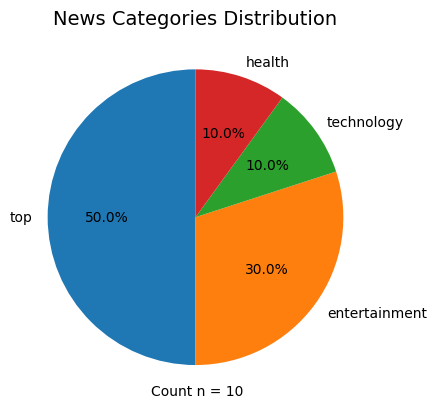

In [43]:

# Create a pie chart
# 1. Add df, 2. Add labels to the chart, 3. choose the chart colors, 4. Add the percentages into the chart, 5. Set the angle which it starts.
#plt.pie(category_counts, labels= labels, colors = colors ,autopct='%1.1f%%', startangle=90)

plt.pie(category_counts,labels = unique_categories, autopct='%1.1f%%', startangle=90)


# Set the title
plt.title('News Categories Distribution', fontsize = 14)

#Adding the count information at the bottom
#After a lot of experimenting with the positions I managed to center the count
plt.text(-0.3, -1.2, f'Count n = 10')

# Display the pie chart
plt.show()

Text(0.5, 0, 'Count N= 10')

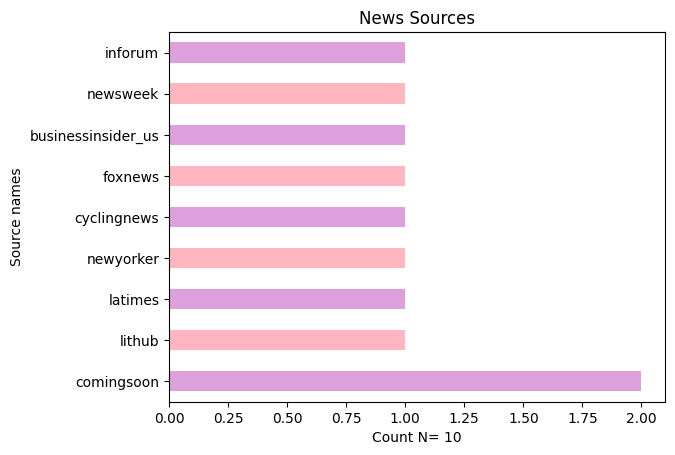

In [44]:
# bahr plot based on the news category
category_counts = News_Df['results.source_id'].value_counts()

# Assuming unique_categories is a NumPy array
unique_categories_series = pd.Series(category_counts)

# Now you can use plot.barh on the Series
unique_categories_series.plot.barh(legend = False, color = ['plum', 'lightpink'])


plt.title('News Sources')
plt.ylabel('Source names')
plt.xlabel('Count N= 10')

In [45]:
category_counts = News_Df['results.source_id'].value_counts()

category_counts

results.source_id
comingsoon            2
lithub                1
latimes               1
newyorker             1
cyclingnews           1
foxnews               1
businessinsider_us    1
newsweek              1
inforum               1
Name: count, dtype: int64

In [46]:
# This only needs to be downloaded once

import nltk
#nltk.download('vader_lexicon')


In [47]:

from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the 'text' column
News_Df['sentiment_scores'] = News_Df['results.content'].apply(lambda x: sia.polarity_scores(x))

# Determine the overall sentiment
News_Df['sentiment'] = News_Df['sentiment_scores'].apply(lambda x: 'Positive' if x['compound'] >= 0.05 else ('Negative' if x['compound'] <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment analysis results

News_Df[['results.content', 'sentiment_scores', 'sentiment']]



,results.content,sentiment_scores,sentiment
0,Also on Lit Hub:,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
1,Mission Raniganj Ending Explained & Spoilers: ...,"{'neg': 0.083, 'neu': 0.722, 'pos': 0.195, 'co...",Positive
2,We still too often talk about video games as e...,"{'neg': 0.055, 'neu': 0.822, 'pos': 0.123, 'co...",Positive
3,"Life is a winding road. A lonely road, a dark ...","{'neg': 0.049, 'neu': 0.818, 'pos': 0.132, 'co...",Positive
4,"As the calendar flips into December, thoughts ...","{'neg': 0.037, 'neu': 0.771, 'pos': 0.193, 'co...",Positive
5,close Video Fox News Flash top headlines for D...,"{'neg': 0.047, 'neu': 0.796, 'pos': 0.157, 'co...",Positive
6,Jennifer Gomez was in prison between 2011 and ...,"{'neg': 0.081, 'neu': 0.847, 'pos': 0.072, 'co...",Negative
7,A Russian man who was convicted for torturing ...,"{'neg': 0.235, 'neu': 0.723, 'pos': 0.042, 'co...",Negative
8,FARGO — After taking it upon himself to plant ...,"{'neg': 0.049, 'neu': 0.873, 'pos': 0.078, 'co...",Positive
9,Karthi’s New Tamil Movie Japan OTT Release Dat...,"{'neg': 0.041, 'neu': 0.861, 'pos': 0.098, 'co...",Positive


In [48]:

sentimentDF = News_Df[['results.source_id','results.content', 'sentiment_scores', 'sentiment']]

sentiment_counts = sentimentDF['sentiment'].value_counts()

sentimentDF

,results.source_id,results.content,sentiment_scores,sentiment
0,lithub,Also on Lit Hub:,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
1,comingsoon,Mission Raniganj Ending Explained & Spoilers: ...,"{'neg': 0.083, 'neu': 0.722, 'pos': 0.195, 'co...",Positive
2,latimes,We still too often talk about video games as e...,"{'neg': 0.055, 'neu': 0.822, 'pos': 0.123, 'co...",Positive
3,newyorker,"Life is a winding road. A lonely road, a dark ...","{'neg': 0.049, 'neu': 0.818, 'pos': 0.132, 'co...",Positive
4,cyclingnews,"As the calendar flips into December, thoughts ...","{'neg': 0.037, 'neu': 0.771, 'pos': 0.193, 'co...",Positive
5,foxnews,close Video Fox News Flash top headlines for D...,"{'neg': 0.047, 'neu': 0.796, 'pos': 0.157, 'co...",Positive
6,businessinsider_us,Jennifer Gomez was in prison between 2011 and ...,"{'neg': 0.081, 'neu': 0.847, 'pos': 0.072, 'co...",Negative
7,newsweek,A Russian man who was convicted for torturing ...,"{'neg': 0.235, 'neu': 0.723, 'pos': 0.042, 'co...",Negative
8,inforum,FARGO — After taking it upon himself to plant ...,"{'neg': 0.049, 'neu': 0.873, 'pos': 0.078, 'co...",Positive
9,comingsoon,Karthi’s New Tamil Movie Japan OTT Release Dat...,"{'neg': 0.041, 'neu': 0.861, 'pos': 0.098, 'co...",Positive


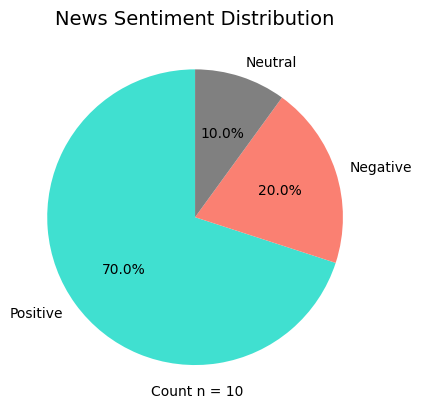

In [49]:

#Changing the color
# Define colors for each sentiment category
colors = {'Positive': 'turquoise', 'Negative': 'salmon', 'Neutral': 'gray'}

# Create a pie chart


# Plotting the pie chart
plt.pie(sentiment_counts, colors=[colors[s] for s in sentiment_counts.index], labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)


# Set the title
plt.title('News Sentiment Distribution', fontsize=14)

#Adding the count information at the bottom
#After a lot of experimenting with the positions I managed to center the count
plt.text(-0.3, -1.2, f"Count n = {sentiment_counts.sum()}")

# Display the pie chart
plt.show()

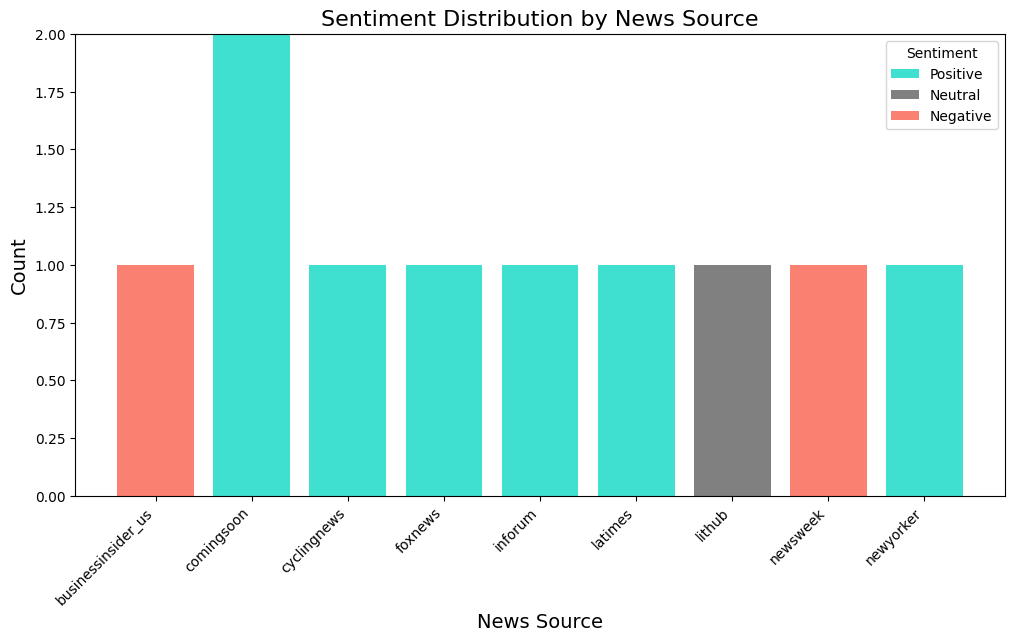

In [51]:

# Group by news source and sentiment, then count occurrences
# The DataFrame is first grouped by 'results.source_id' and 'sentiment' using groupby() and size() to count occurrences.
# The unstack() function is used to pivot the table for easier plotting

grouped_sentiments = sentimentDF.groupby(['results.source_id', 'sentiment']).size().unstack(fill_value=0)

# Set up the figure and axis
plt.figure(figsize=(12, 6))
ax = plt.subplot()

# Plot positive sentiments in green
ax.bar(grouped_sentiments.index, grouped_sentiments['Positive'], color='turquoise', label='Positive')

# Plot neutral sentiments in gray
ax.bar(grouped_sentiments.index, grouped_sentiments['Neutral'], color='gray', label='Neutral')

# Plot negative sentiments in red
ax.bar(grouped_sentiments.index, grouped_sentiments['Negative'], color='salmon', label='Negative', bottom=grouped_sentiments['Positive'])

# Customize the plot
plt.title('Sentiment Distribution by News Source', fontsize=16)
plt.xlabel('News Source', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')

# Show the plot
plt.show()


In [59]:
# News API
# Retrieve NewData.io information
new_response_bbc = api.news_api( language='en' ,country = "gb", domain='bbc')


# Convert the list of dictionaries to a DataFrame
df3 = pd.DataFrame(new_response_bbc)



# Flatten the nested structure
df_flattened3 = json_normalize(df3.to_dict('records'))


#News_BBC_Df_flat = df_flattened3.drop('status', axis=1)

# Clean up dataframe
News_BBC_Df_flat = df_flattened3.drop(['results.keywords', 'results.creator','status','results.image_url', 'totalResults', 'nextPage', 'results.article_id', 'results.video_url', 'results.source_priority'], axis = 1)


BBC_News_Df = News_BBC_Df_flat

BBC_News_Df

,results.title,results.link,results.description,results.content,results.pubDate,results.source_id,results.country,results.category,results.language
0,COP28 president hits back at climate denial cl...,https://www.bbc.co.uk/news/science-environment...,"""Everything we do is centred behind the scienc...",COP28 president hits back at climate denial cl...,2023-12-04 10:42:00,bbc,[united kingdom],[science],english
1,"Spotify to axe 1,500 workers to save costs",https://www.bbc.co.uk/news/business-67611361?a...,The music-streaming company says it is making ...,"Spotify to axe 1,500 workers to save costs Pub...",2023-12-04 08:05:14,bbc,[united kingdom],[business],english
2,British lawyers could be sent to Rwandan court...,https://www.bbc.co.uk/news/uk-67610480?at_medi...,The government hopes changes to policy will ad...,British lawyers could be sent to Rwandan court...,2023-12-04 05:58:23,bbc,[united kingdom],[top],english
3,Water firm wrongly downgraded pollution events...,https://www.bbc.co.uk/news/science-environment...,Leaked papers suggest United Utilities logged ...,Water firm wrongly downgraded pollution events...,2023-12-04 05:50:39,bbc,[united kingdom],[top],english
4,Ukraine war: Soldier tells BBC of front-line '...,https://www.bbc.co.uk/news/world-europe-675655...,A Ukrainian soldier on the east side of the Dn...,Ukraine war: Soldier tells BBC of front-line '...,2023-12-04 05:45:37,bbc,[united kingdom],[top],english
5,North facing 'ice rink Monday' as freeze hits ...,https://www.bbc.co.uk/news/uk-67610396?at_medi...,Several Met Office weather warnings are in pla...,North facing 'ice rink Monday' as freeze hits ...,2023-12-04 04:50:23,bbc,[united kingdom],[top],english
6,BBC should be 'realistic' on licence fee - Sunak,https://www.bbc.co.uk/news/uk-67610100?at_medi...,The PM welcomes savings at the BBC and says de...,BBC should be 'realistic' on licence fee - Sun...,2023-12-04 01:57:58,bbc,[united kingdom],[top],english
7,Record number of girls on Borders College farm...,https://www.bbc.co.uk/news/uk-scotland-south-s...,A record number of female students have starte...,Record number of girls on Borders College farm...,2023-12-04 00:14:02,bbc,[united kingdom],[science],english
8,How weather apps are trying to be more accurate,https://www.bbc.co.uk/news/business-67541931?a...,Forecasters are continuing to offer more real-...,How weather apps are trying to be more accurat...,2023-12-04 00:12:36,bbc,[united kingdom],[science],english
9,"BBC Sound of 2024: Tyla, Last Dinner Party and...",https://www.bbc.co.uk/news/entertainment-arts-...,Other rising music stars up for the prize incl...,"BBC Sound of 2024: Tyla, Last Dinner Party and...",2023-12-04 00:00:03,bbc,[united kingdom],[entertainment],english


In [64]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the 'text' column
BBC_News_Df['sentiment_scores'] = BBC_News_Df['results.content'].apply(lambda x: sia.polarity_scores(x))

# Determine the overall sentiment
BBC_News_Df['sentiment'] = BBC_News_Df['sentiment_scores'].apply(lambda x: 'Positive' if x['compound'] >= 0.05 else ('Negative' if x['compound'] <= -0.05 else 'Neutral'))

# Print the DataFrame with sentiment analysis results

BBC_News_Df[['results.content', 'sentiment_scores','results.category', 'sentiment']]

,results.content,sentiment_scores,results.category,sentiment
0,COP28 president hits back at climate denial cl...,"{'neg': 0.056, 'neu': 0.851, 'pos': 0.094, 'co...",[science],Positive
1,"Spotify to axe 1,500 workers to save costs Pub...","{'neg': 0.032, 'neu': 0.828, 'pos': 0.14, 'com...",[business],Positive
2,British lawyers could be sent to Rwandan court...,"{'neg': 0.04, 'neu': 0.861, 'pos': 0.099, 'com...",[top],Positive
3,Water firm wrongly downgraded pollution events...,"{'neg': 0.081, 'neu': 0.822, 'pos': 0.097, 'co...",[top],Positive
4,Ukraine war: Soldier tells BBC of front-line '...,"{'neg': 0.157, 'neu': 0.787, 'pos': 0.056, 'co...",[top],Negative
5,North facing 'ice rink Monday' as freeze hits ...,"{'neg': 0.052, 'neu': 0.908, 'pos': 0.04, 'com...",[top],Negative
6,BBC should be 'realistic' on licence fee - Sun...,"{'neg': 0.045, 'neu': 0.862, 'pos': 0.093, 'co...",[top],Positive
7,Record number of girls on Borders College farm...,"{'neg': 0.031, 'neu': 0.844, 'pos': 0.125, 'co...",[science],Positive
8,How weather apps are trying to be more accurat...,"{'neg': 0.027, 'neu': 0.86, 'pos': 0.113, 'com...",[science],Positive
9,"BBC Sound of 2024: Tyla, Last Dinner Party and...","{'neg': 0.043, 'neu': 0.831, 'pos': 0.126, 'co...",[entertainment],Positive


In [65]:

BBC_News_Df_Sentiment = BBC_News_Df[['results.source_id','results.content','results.category', 'sentiment_scores', 'sentiment']]

BBC_sentiment_counts = BBC_News_Df_Sentiment['sentiment'].value_counts()

BBC_News_Df_Sentiment

,results.source_id,results.content,results.category,sentiment_scores,sentiment
0,bbc,COP28 president hits back at climate denial cl...,[science],"{'neg': 0.056, 'neu': 0.851, 'pos': 0.094, 'co...",Positive
1,bbc,"Spotify to axe 1,500 workers to save costs Pub...",[business],"{'neg': 0.032, 'neu': 0.828, 'pos': 0.14, 'com...",Positive
2,bbc,British lawyers could be sent to Rwandan court...,[top],"{'neg': 0.04, 'neu': 0.861, 'pos': 0.099, 'com...",Positive
3,bbc,Water firm wrongly downgraded pollution events...,[top],"{'neg': 0.081, 'neu': 0.822, 'pos': 0.097, 'co...",Positive
4,bbc,Ukraine war: Soldier tells BBC of front-line '...,[top],"{'neg': 0.157, 'neu': 0.787, 'pos': 0.056, 'co...",Negative
5,bbc,North facing 'ice rink Monday' as freeze hits ...,[top],"{'neg': 0.052, 'neu': 0.908, 'pos': 0.04, 'com...",Negative
6,bbc,BBC should be 'realistic' on licence fee - Sun...,[top],"{'neg': 0.045, 'neu': 0.862, 'pos': 0.093, 'co...",Positive
7,bbc,Record number of girls on Borders College farm...,[science],"{'neg': 0.031, 'neu': 0.844, 'pos': 0.125, 'co...",Positive
8,bbc,How weather apps are trying to be more accurat...,[science],"{'neg': 0.027, 'neu': 0.86, 'pos': 0.113, 'com...",Positive
9,bbc,"BBC Sound of 2024: Tyla, Last Dinner Party and...",[entertainment],"{'neg': 0.043, 'neu': 0.831, 'pos': 0.126, 'co...",Positive


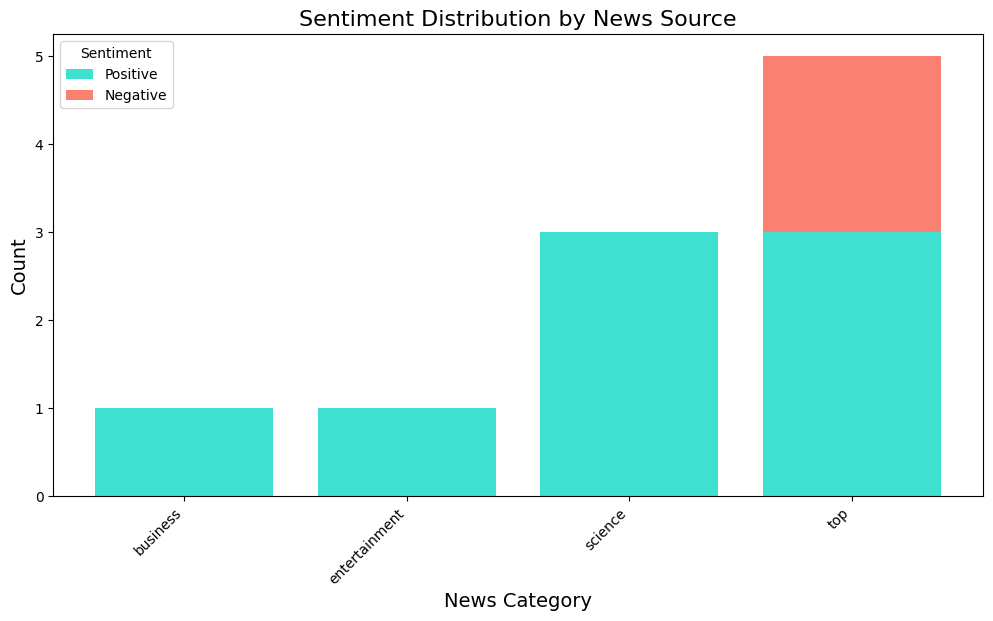

In [79]:
# Group by news source and sentiment, then count occurrences
# The DataFrame is first grouped by 'results.source_id' and 'sentiment' using groupby() and size() to count occurrences.
# The unstack() function is used to pivot the table for easier plotting

unique_categories = BBC_News_Df_Sentiment['results.category'].explode().unique()


#This code uses the explode function to transform each list in 'results.category' 
# into separate rows before performing the grouping operation.
# Explode the lists in 'results.category'
BBC_News_Df_Sentiment_exploded = BBC_News_Df_Sentiment.explode('results.category')


# Group by 'results.category' and 'sentiment', then count occurrences
grouped_sentiments = BBC_News_Df_Sentiment_exploded.groupby(['results.category', 'sentiment']).size().unstack(fill_value=0)


# Set up the figure and axis
plt.figure(figsize=(12, 6))
ax = plt.subplot()

# Plot positive sentiments in green
ax.bar(grouped_sentiments.index, grouped_sentiments['Positive'], color='turquoise', label='Positive')

# Plot neutral sentiments in gray
#ax.bar(grouped_sentiments.index, grouped_sentiments['Neutral'], color='gray', label='Neutral')

# Plot negative sentiments in red
ax.bar(grouped_sentiments.index, grouped_sentiments['Negative'], color='salmon', label='Negative', bottom=grouped_sentiments['Positive'])

# Customize the plot
plt.title('Sentiment Distribution by News Source', fontsize=16)
plt.xlabel('News Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')

# Show the plot
plt.show()